In [1]:
from globalfunc import *

#### Spectra

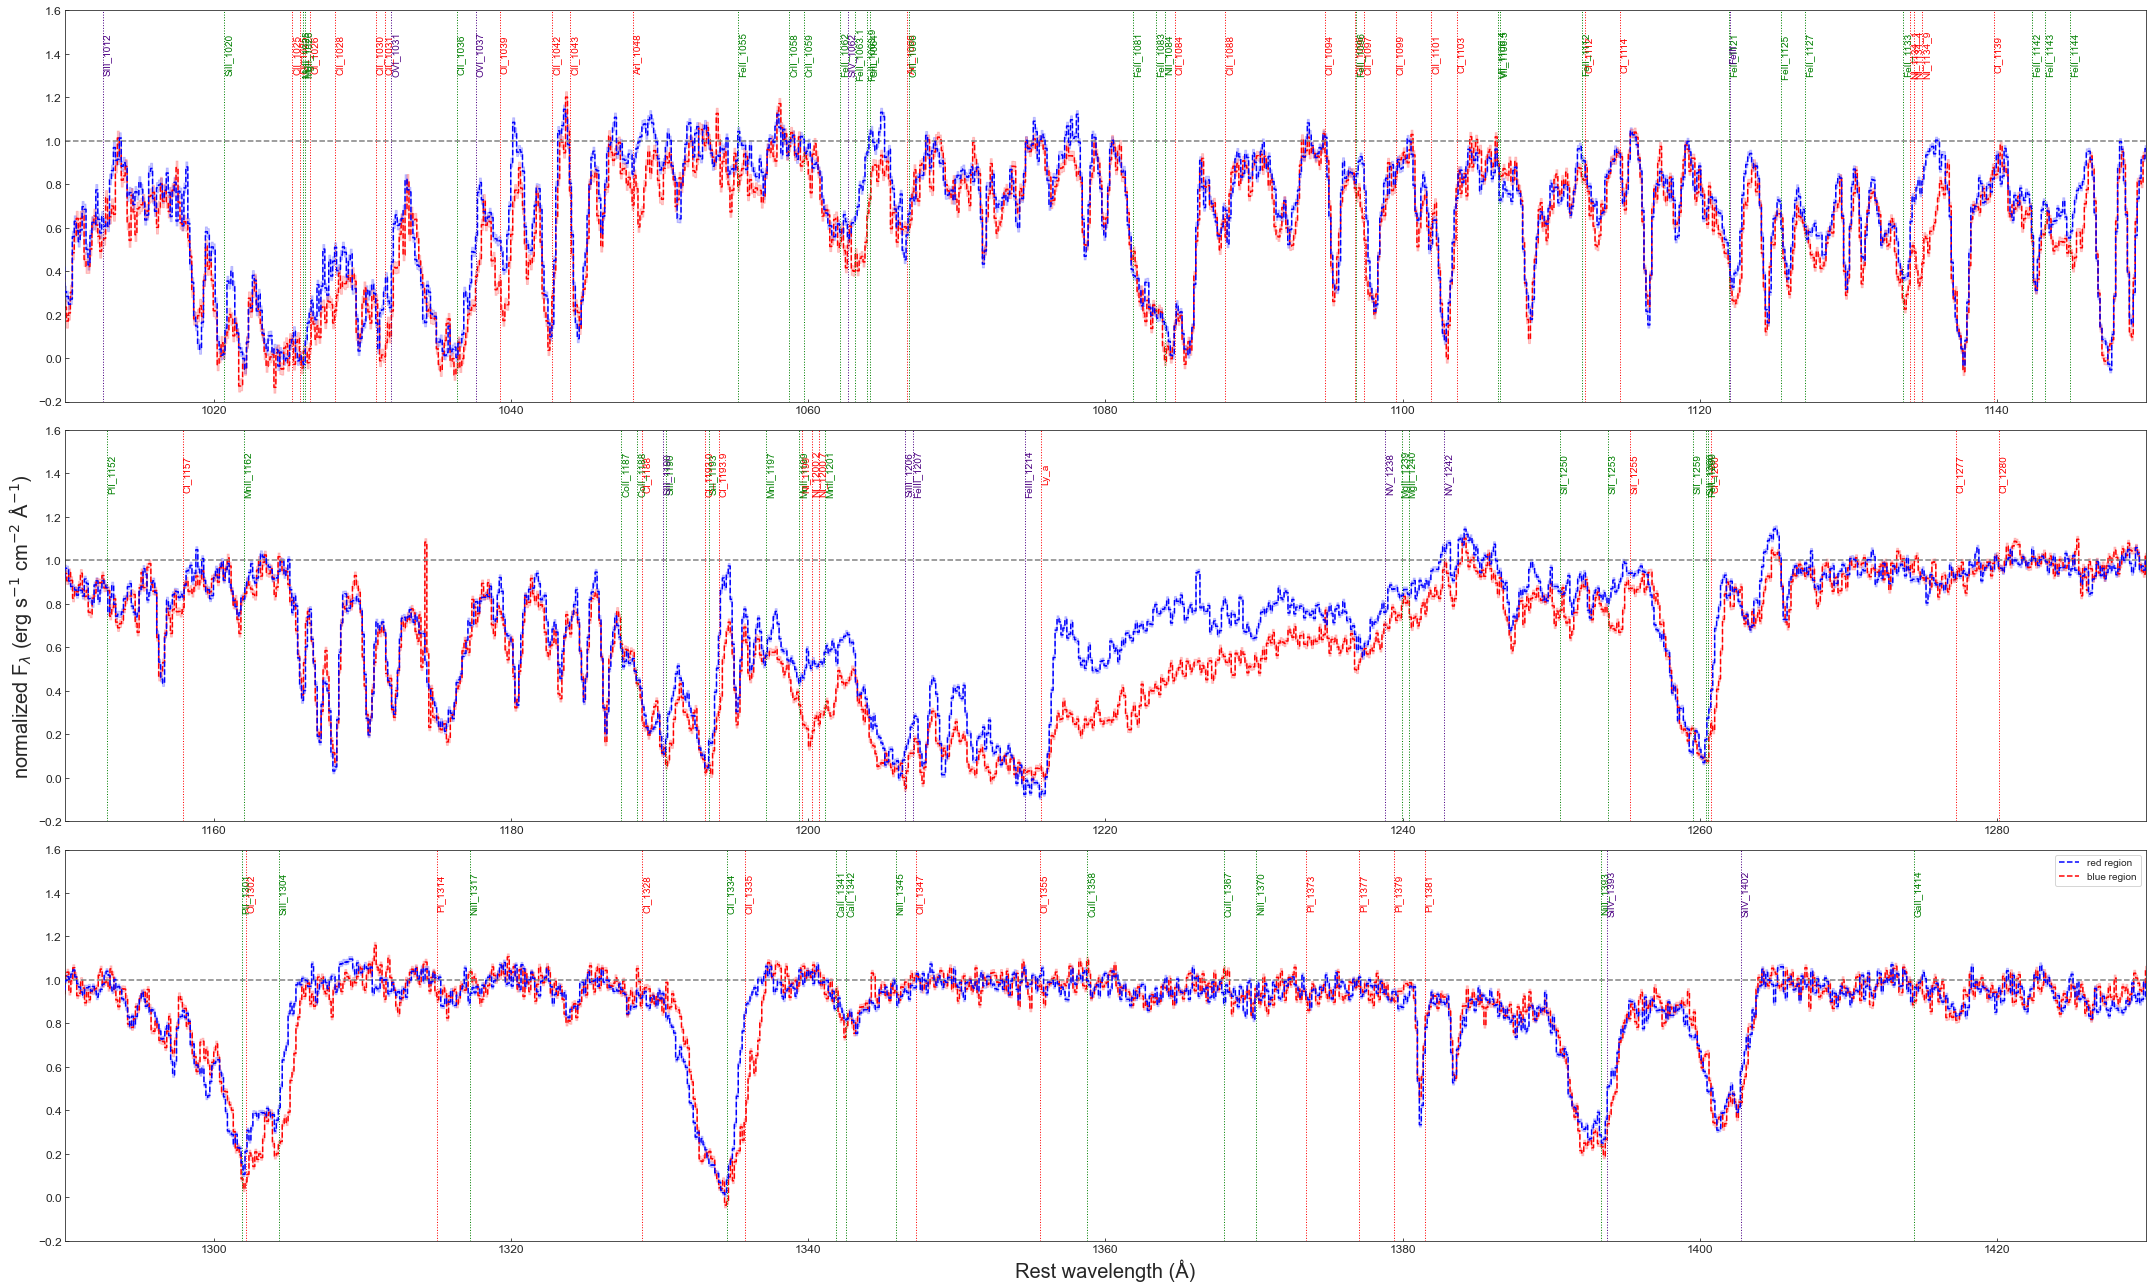

In [2]:
# plotting the spectra

fig, ax = plt.subplots(3,1,figsize=(30, 18),
                    #   dpi=900 
                        )

for i in range(3):
    ax[i].plot(nwavelength, rnorm, drawstyle="steps-mid", color=ap1color,ls = '--', zorder=3, label = 'red region')
    ax[i].fill_between(nwavelength, rnorm-rnorm_err, rnorm+rnorm_err, step='mid', color=ap1color, alpha =0.2)
    ax[i].plot(nwavelength, bnorm, drawstyle="steps-mid", color=ap0color,ls = '--', zorder=2, label = 'blue region')
    ax[i].fill_between(nwavelength, bnorm-bnorm_err, bnorm+bnorm_err, step='mid', color=ap0color, alpha =0.2)
    ax[i].axhline(y=1, color='gray',ls = '--')

    for line in rlines.items():
        ax[i].axvline(line[1], linestyle=":", color="red", lw=1)
        ax[i].text(line[1],1.4, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    for line in glines.items():
        ax[i].axvline(line[1], linestyle=":", color="green", lw=1)
        ax[i].text(line[1],1.4, line[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
    for line in tlines.items():
        ax[i].axvline(line[1], linestyle=":", color="indigo", lw=1)
        ax[i].text(line[1],1.4, line[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)


# define the wavelength limits for each subplot
ax[0].axis([1010,1150,-0.2,1.6])
ax[1].axis([1150,1290,-0.2,1.6])
ax[2].axis([1290,1430,-0.2,1.6])

plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax[1].set_ylabel("normalized F$_{\\lambda}$ (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)", fontsize=20)
plt.tight_layout()
plt.legend()
# plt.savefig('improved.png')
plt.show()

#### Velocity profiles

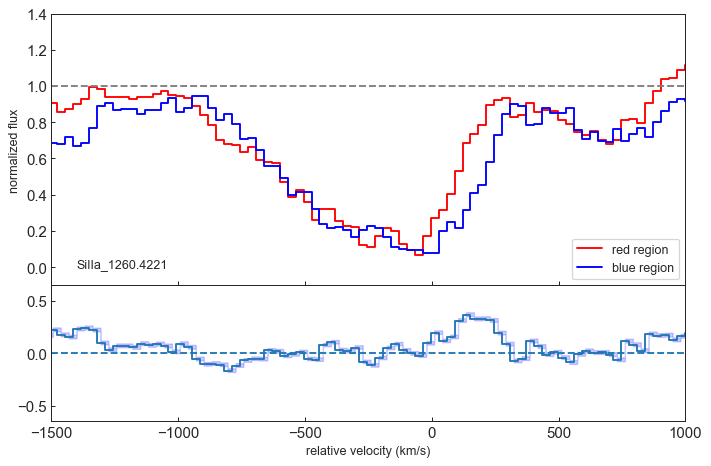

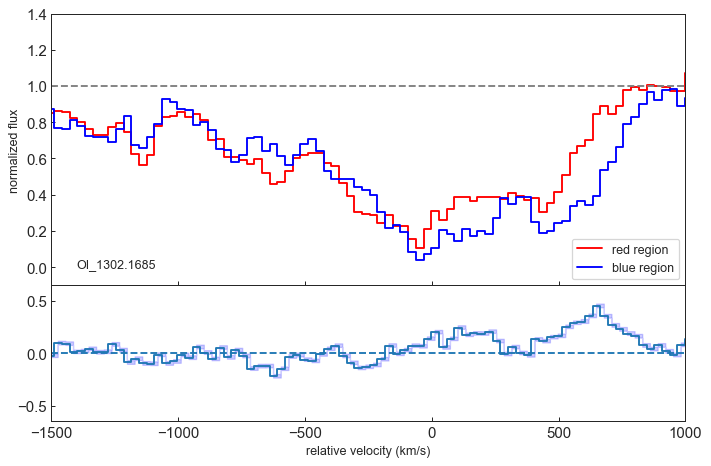

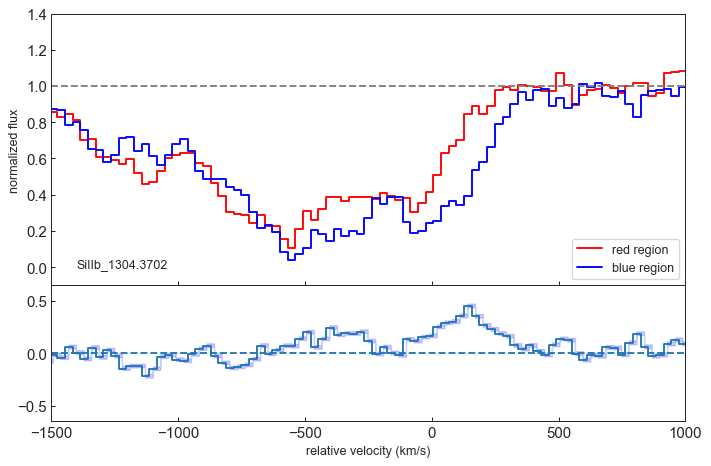

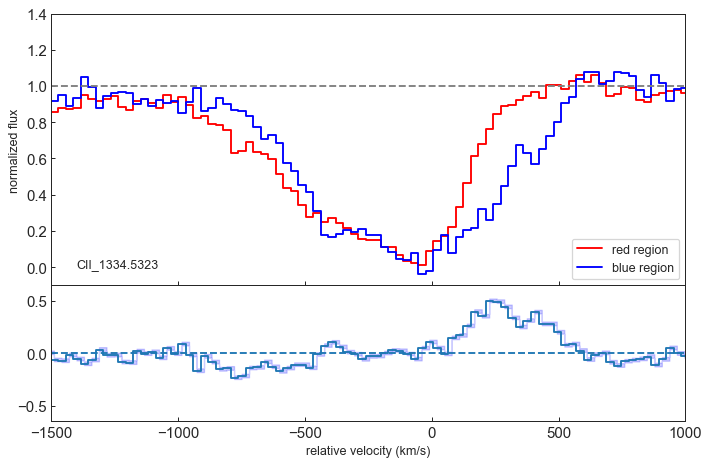

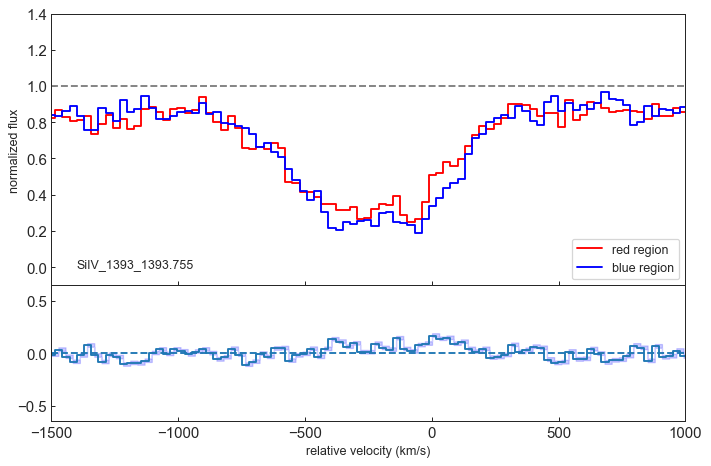

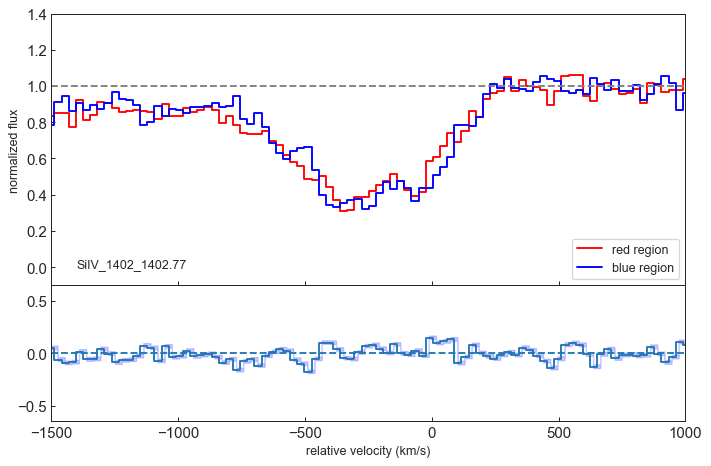

In [3]:

for j in abslines.items(): # for the absorption lines lambda > Lya
    vel_prof(rnorm,bnorm,j)

# use bluelines1.items() or bluelines.items() for lambda < Lya

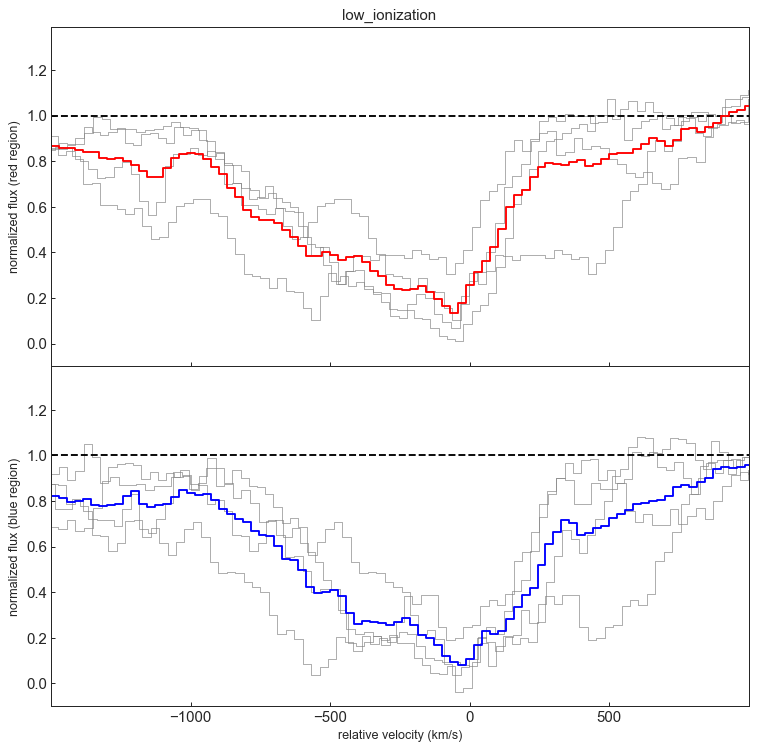

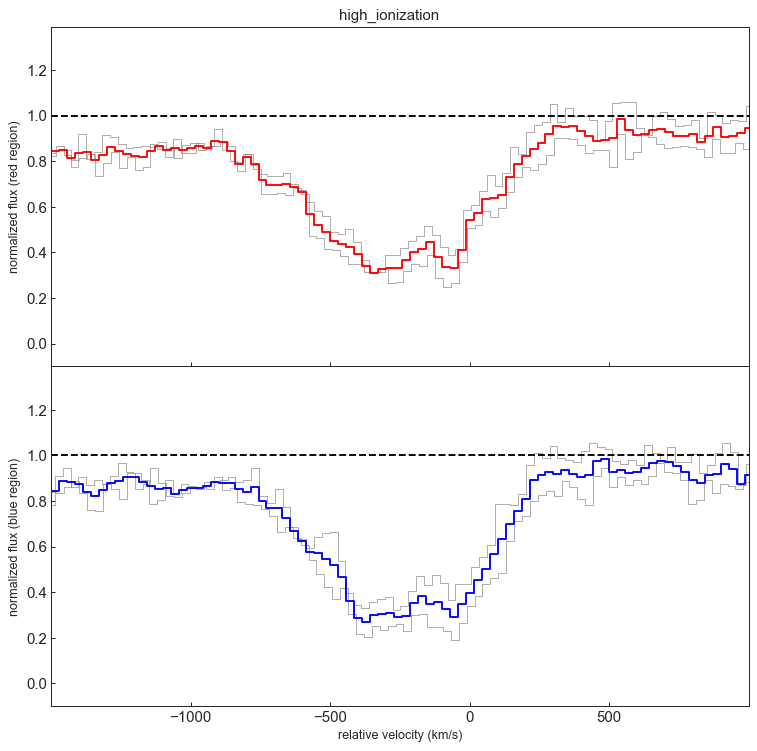

In [4]:
# plotting the AVERAGE profile for the absorption lines
avg_velpro(low_ion,(rnorm,bnorm))
avg_velpro(high_ion,(rnorm,bnorm))

#### Equivalent Width

-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 2.924 +/- 0.071 Angstrom
EW for ('OI', 1302.1685) is 3.433 +/- 0.072 Angstrom
EW for ('SiIIb', 1304.3702) is 3.116 +/- 0.067 Angstrom
EW for ('CII', 1334.5323) is 3.330 +/- 0.068 Angstrom
EW for ('SiIV_1393', 1393.755) is 2.767 +/- 0.078 Angstrom
EW for ('SiIV_1402', 1402.77) is 2.164 +/- 0.077 Angstrom
-----------------------------------------------------
-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 3.184 +/- 0.080 Angstrom
EW for ('OI', 1302.1685) is 3.531 +/- 0.089 Angstrom
EW for ('SiIIb', 1304.3702) is 3.772 +/- 0.088 Angstrom
EW for ('CII', 1334.5323) is 3.670 +/- 0.095 Angstrom
EW for ('SiIV_1393', 1393.755) is 2.985 +/- 0.095 Angstrom
EW for ('SiIV_1402', 1402.77) is 2.134 +/- 0.096 Angstrom
-----------------------------------------------------


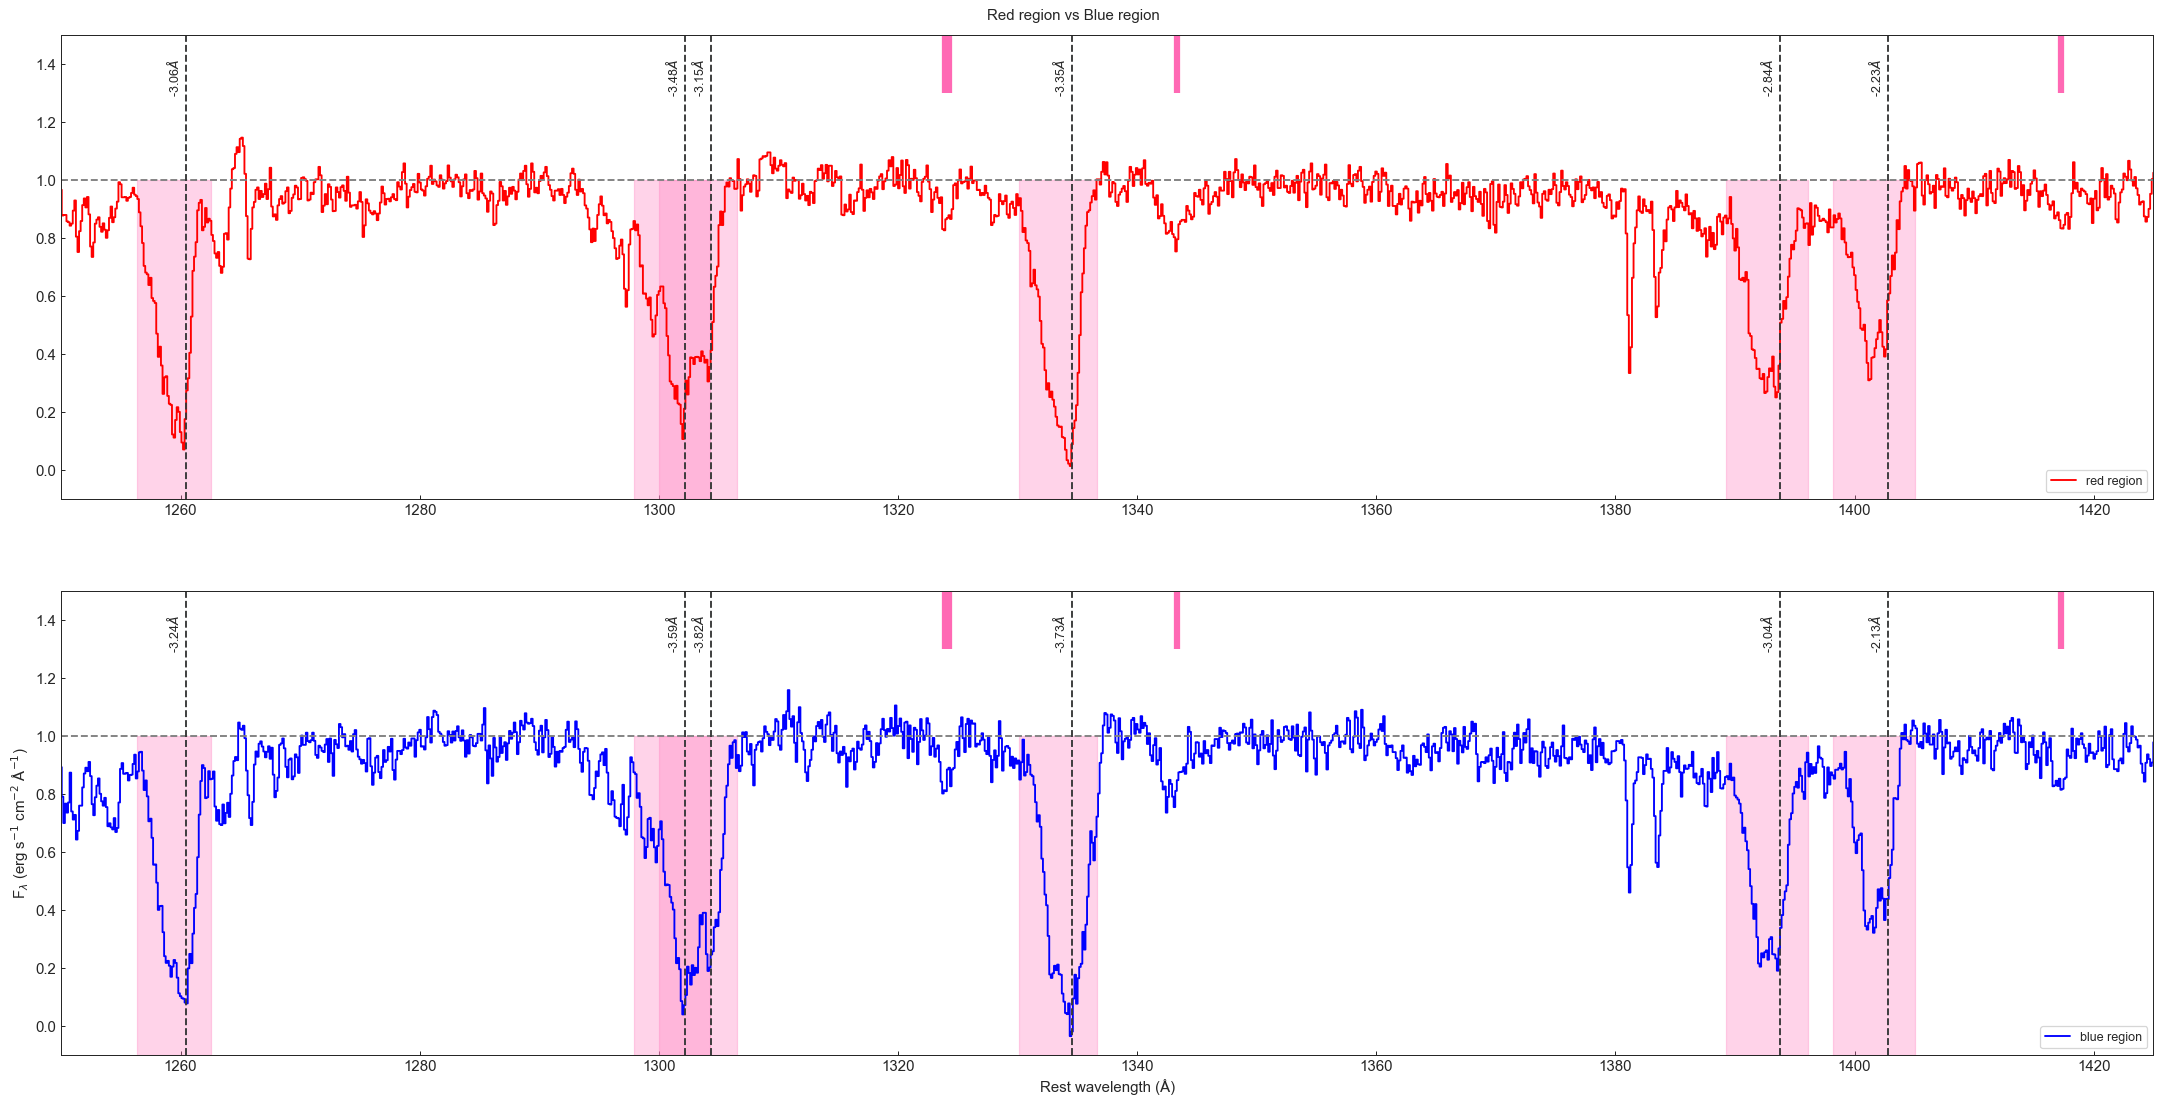

In [5]:
# Calculate the EW of the absorption lines and plot them for both regions

# ew_calc(nwavelength, (rnorm,), (rnorm_err,), abslines)
# ew_calc(nwavelength, (bnorm,), (bnorm_err,), abslines)
ew_calc(nwavelength, (rnorm,bnorm), (rnorm_err,bnorm_err), abslines)

#### Plot : Optical depth vs wavelength

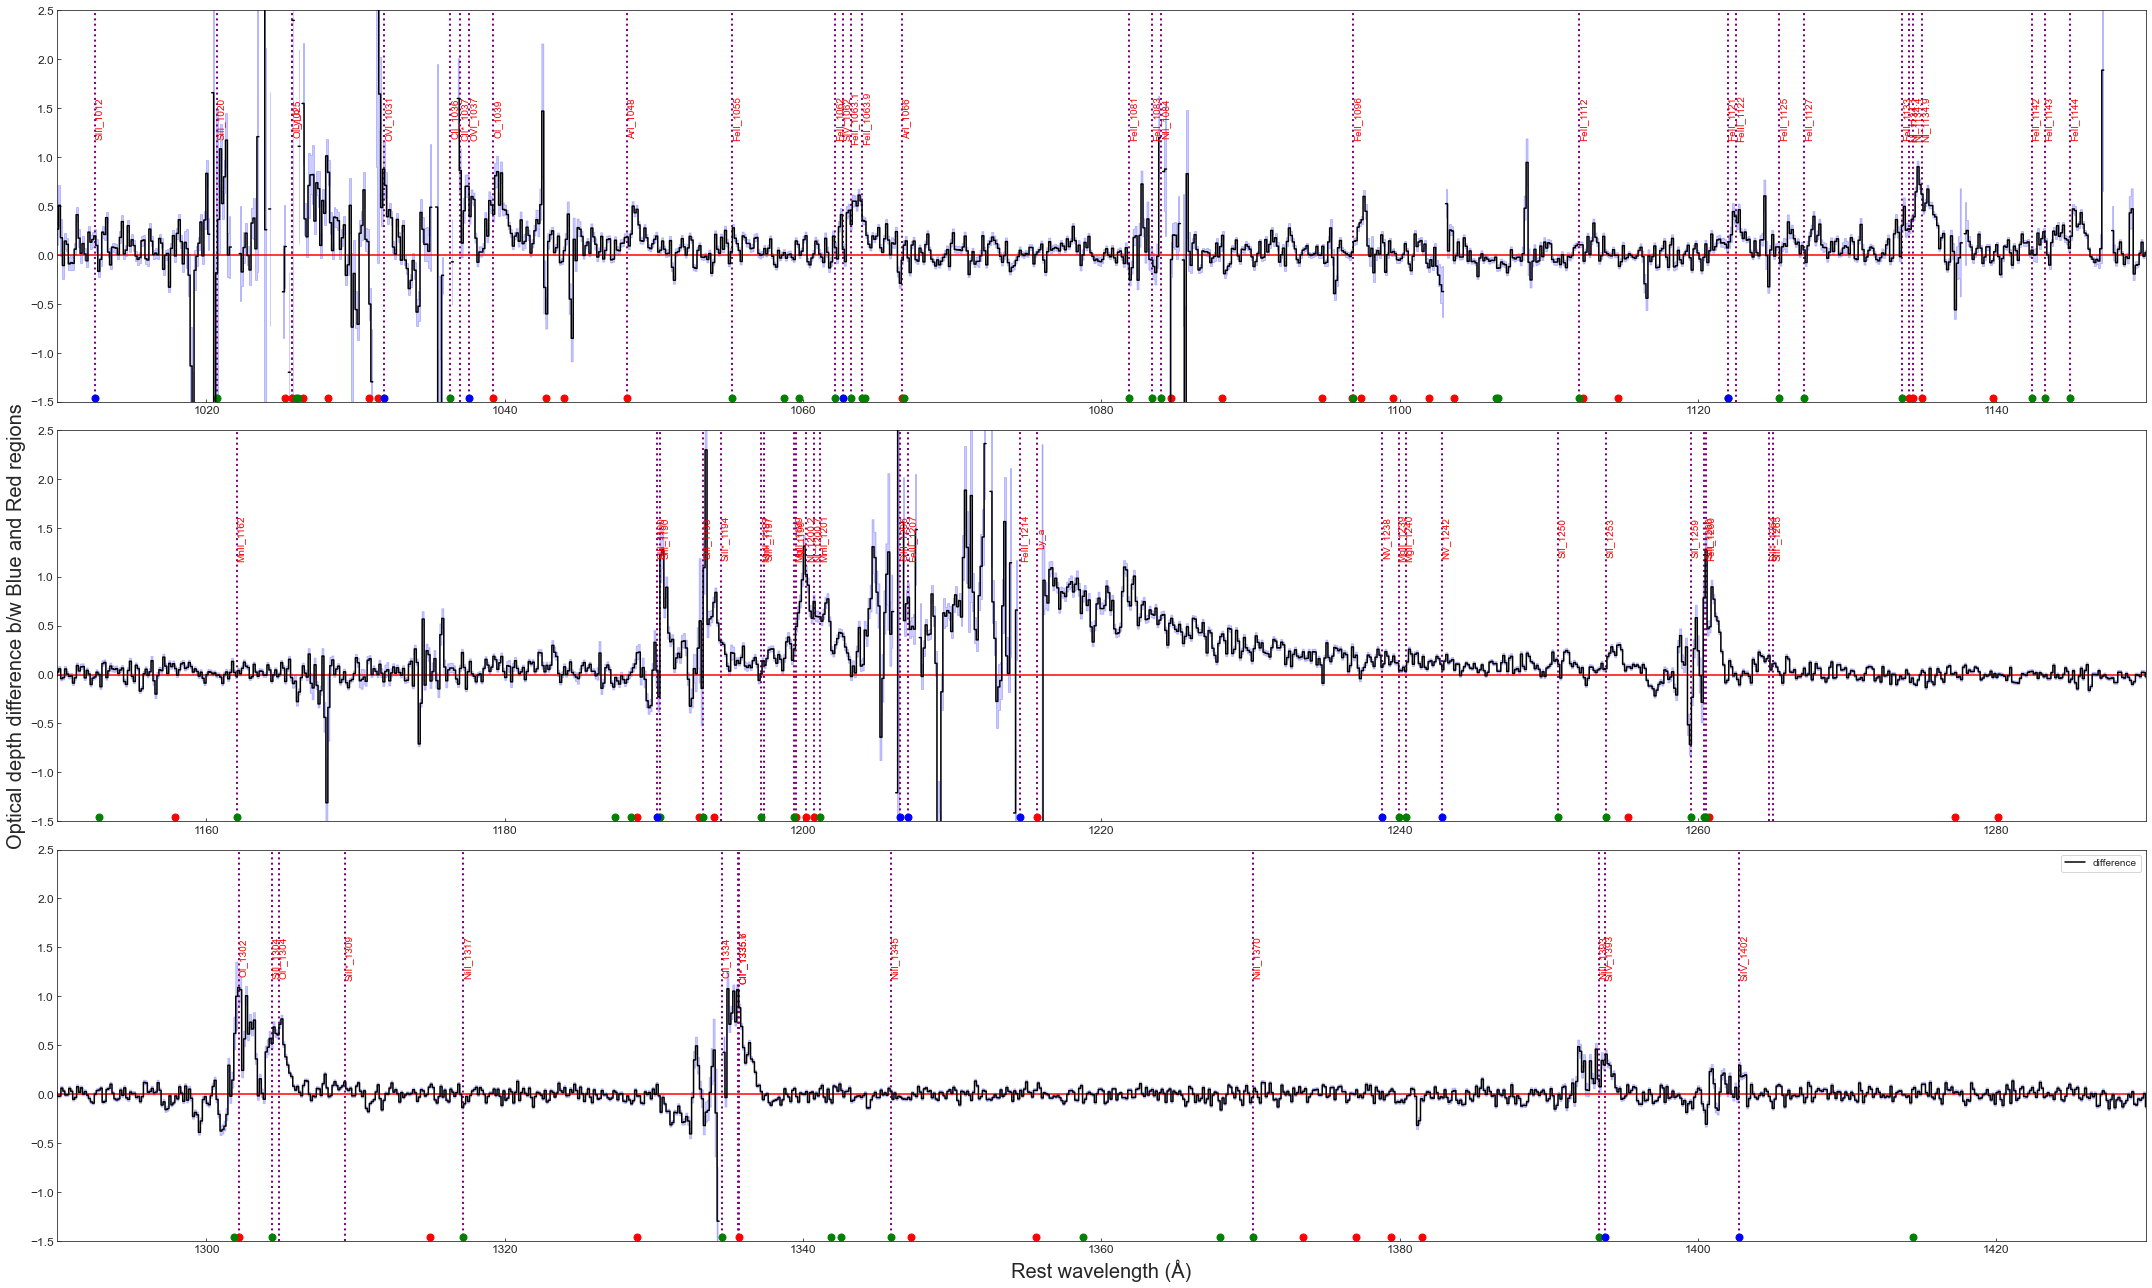

In [6]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
od_r = np.log(1/rnorm.value)
od_b = np.log(1/bnorm.value)
od_r_err = rnorm_err.value/rnorm.value
od_b_err = bnorm_err.value/bnorm.value
od_diff_err = np.sqrt(od_r_err**2 + od_b_err**2)

fig, ax = plt.subplots(3,1,figsize=(30, 18),
                #  dpi=900
                )
for i in range(3):
    ax[i].plot(nwavelength, od_b-od_r, drawstyle="steps-mid", color = 'black', zorder=3, label = 'difference')
    ax[i].fill_between(nwavelength, od_b-od_r-od_diff_err, od_b-od_r+od_diff_err, step='mid', color=ap1color, alpha =0.2)
    ax[i].axhline(y=0, color='red', ls = '-')
    for line in newlines.items():
        ax[i].axvline(line[1], linestyle=":", color="purple", lw=2)
        ax[i].text(line[1],1.4, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    for line in rlines.items():
        ax[i].plot(line[1], -1.46, 'ro', markersize = 7)
    for line in glines.items():
        ax[i].plot(line[1], -1.46, 'go', markersize = 7)
    for line in tlines.items():
        ax[i].plot(line[1], -1.46, 'bo', markersize = 7)

    
ax[0].axis([1010,1150,-1.5,2.5])
ax[1].axis([1150,1290,-1.5,2.5])
ax[2].axis([1290,1430,-1.5,2.5])


# plot_lines(ax1,ax2,ax3,1.4,'y')
plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax[1].set_ylabel("Optical depth difference b/w Blue and Red regions", fontsize=20)
plt.tight_layout()
plt.legend()
# plt.savefig('diff_line_optdepth.png')
plt.show()

#### Plot : Column density vs relative velocity

log(N) for SiIIa (red region) is 14.493805 +/- 0.017600
log(N) for SiIIa (blue region) is 14.589698 +/- 0.023218
log(N) for CII (red region) is 15.557160 +/- 0.023492
log(N) for CII (blue region) is nan +/- 0.000000
log(N) for SiIV_1393 (red region) is 14.655715 +/- 0.015381
log(N) for SiIV_1393 (blue region) is 14.721047 +/- 0.020966
log(N) for SiIV_1402 (red region) is 14.811250 +/- 0.018085
log(N) for SiIV_1402 (blue region) is 14.843601 +/- 0.024091


'Without using co=1, to see profiles of 2 different lines in the same plot'

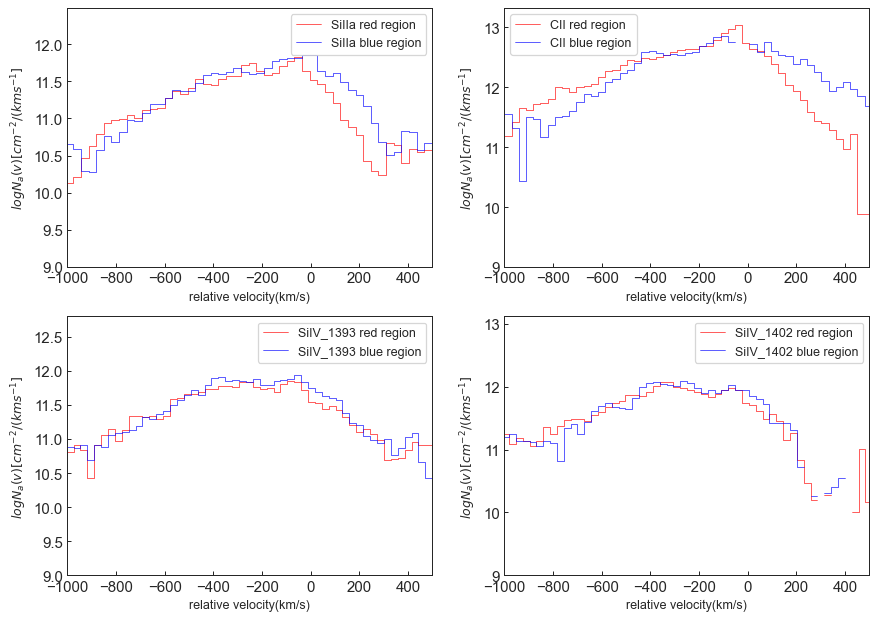

In [7]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# syntax : cold_prof2 ( absorption line | f-value | data | region(blue/red) | color )

fig = plt.figure(num=3,figsize=(10,7),dpi=90)
ax1 = plt.subplot(221)
cold_prof2(("SiIIa", 1260.4221),1.180,rnorm,'red',1)
cold_prof2(("SiIIa", 1260.4221),1.180,bnorm,'blue',1)
ax2 = plt.subplot(222)
cold_prof2(("CII", 1334.5323),1.28E-01,rnorm,'red',1) 
cold_prof2(("CII", 1334.5323),1.28E-01,bnorm,'blue',1)
ax3 = plt.subplot(223)
cold_prof2(('SiIV_1393', 1393.7550),5.13E-01,rnorm,'red',1) 
cold_prof2(('SiIV_1393', 1393.7550),5.13E-01,bnorm,'blue',1)
ax4 = plt.subplot(224)
cold_prof2(('SiIV_1402', 1402.77),2.54E-01,rnorm,'red',1) 
cold_prof2(('SiIV_1402', 1402.77),2.54E-01,bnorm,'blue',1)

plt.tight_layout()
#f-values from Donald C. Morton 10.1086/377639

# ------------------------------------------------------------------
# fig = plt.figure(num=2,figsize=(10,7),dpi=90)
# cold_prof(lines_to_measure[-2],0.513,rnorm,'red')
# cold_prof(lines_to_measure[-1],0.254,rnorm,'red')


# fig = plt.figure(num=3,figsize=(10,7),dpi=90)
# cold_prof(lines_to_measure[-2],0.513,bnorm,'blue')
# cold_prof(lines_to_measure[-1],0.254,bnorm,'blue')
# ------------------------------------------------------------------
'''Without using co=1, to see profiles of 2 different lines in the same plot'''
# fig = plt.figure(num=1,figsize=(10,7),dpi=90)
# cold_prof2(("CII", 1334.5323),1.28E-01,rnorm,'red')
# cold_prof2(("SiIIa", 1260.4221),1.180,rnorm,'red')

log(N) for NI_1200.2 (red region) is 15.461772 +/- 0.015070
log(N) for NI_1200.2 (blue region) is 15.690586 +/- 0.017454
log(N) for NI_1134_9 (red region) is 15.641985 +/- 0.020315
log(N) for NI_1134_9 (blue region) is 15.898437 +/- 0.019933
log(N) for FeII_1142 (red region) is 16.635176 +/- 0.020812
log(N) for FeII_1142 (blue region) is 16.730701 +/- 0.021616
log(N) for FeII_1143 (red region) is 16.024202 +/- 0.018980
log(N) for FeII_1143 (blue region) is 16.066130 +/- 0.021034
log(N) for FeII_1144 (red region) is 15.374345 +/- 0.018341
log(N) for FeII_1144 (blue region) is 15.464789 +/- 0.019159


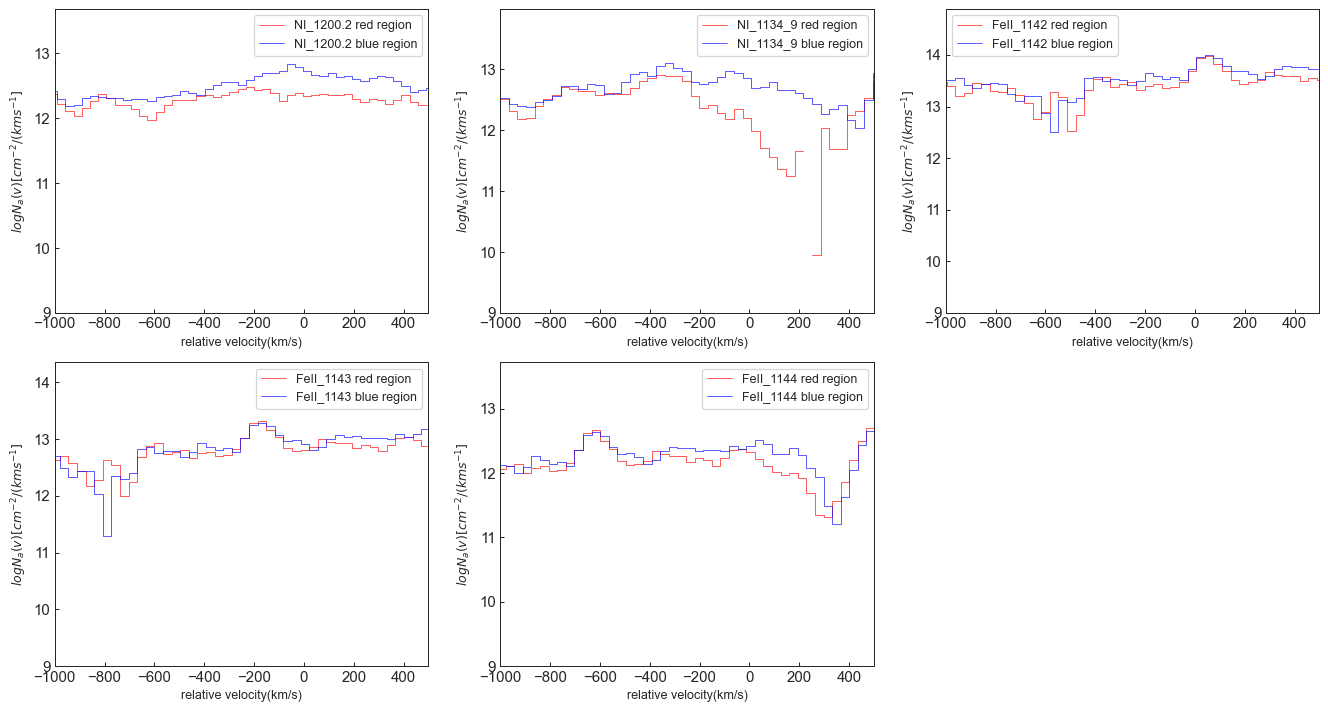

In [8]:
# bluelines1
blines_to_measure = list(bluelines1.values())

fig = plt.figure(num=4,figsize=(15,8),dpi=90)
ax1 = plt.subplot(231)
cold_prof2(('NI_1200.2', 1200.2233),8.69E-02,rnorm,'red',1)
cold_prof2(('NI_1200.2', 1200.2233),8.69E-02,bnorm,'blue',1)

ax2 = plt.subplot(232)
cold_prof2(('NI_1134_9', 1134.9803),4.16E-02,rnorm,'red',1) 
cold_prof2(('NI_1134_9', 1134.9803),4.16E-02,bnorm,'blue',1)

ax3 = plt.subplot(233)
cold_prof2(('FeII_1142', 1142.3656),4.01E-03,rnorm,'red',1) 
cold_prof2(('FeII_1142', 1142.3656),4.01E-03,bnorm,'blue',1)

ax4 = plt.subplot(234)
cold_prof2(('FeII_1143', 1143.226),1.92E-02,rnorm,'red',1) 
cold_prof2(('FeII_1143', 1143.226),1.92E-02,bnorm,'blue',1)

ax5 = plt.subplot(235)
cold_prof2(('FeII_1144', 1144.9379),8.30E-02,rnorm,'red',1) 
cold_prof2(('FeII_1144', 1144.9379),8.30E-02,bnorm,'blue',1)
plt.tight_layout()

#f-values from Donald C. Morton 10.1086/377639

In [9]:
# LOW ionization optical depth comparison
# ------------------------------------------------------------------
xvals = np.linspace(-1500,1500,106) * u.km/u.s

'''
we don't want to lose any data, and 106 points is around the upper limit 
in the (-1500,1500) range so it is easier to map data for all ionization 
lines to the same x-axis.
'''
low_od_r = np.array([abslines_od(('SiIIa', 1260.4221),rnorm),
                        abslines_od(("CII", 1334.5323),rnorm),
                        abslines_od(('OI', 1302.1685),rnorm,(400,798)),
                        abslines_od(('SiIIb', 1304.3702),rnorm,(-700,-190))])

low_od_b = np.array([abslines_od(('SiIIa', 1260.4221),bnorm),
                        abslines_od(("CII", 1334.5323),bnorm),
                        abslines_od(('OI', 1302.1685),bnorm,(400,798)),
                        abslines_od(('SiIIb', 1304.3702),bnorm,(-700,-190))])

# masking for OI and SiIIb -- repeats/closely spaced

# HIGH ionization optical depth comparison
# ------------------------------------------------------------------
high_od_r = np.nanmean((abslines_od(('SiIV_1393', 1393.75),rnorm),
                        abslines_od(('SiIV_1402', 1402.75),rnorm)),axis=0)
high_od_b = np.nanmean((abslines_od(('SiIV_1393', 1393.75),bnorm),
                        abslines_od(('SiIV_1402', 1402.75),bnorm)),axis=0)


# ------------------------------------------------------------------
# [0] for red and [1] for blue / recall col=(ap0color,ap1color)
norm_data = (rnorm,bnorm) #normalized flux
od = (od_r,od_b) #optical depth
od_err = (od_r_err,od_b_err) #optical depth error
low_od = (low_od_r,low_od_b) #low ionization optical depth
high_od = (high_od_r,high_od_b) #high ionization optical depth
# ------------------------------------------------------------------

# mask the velocities corresponding to the range
opp = np.where((velo(("SiIIb", 1304.3702)).value<-700) | (velo(("SiIIb", 1304.3702)).value>-200), velo(("SiIIb", 1304.3702)), np.nan)
opp1 = np.where((velo(("OI", 1302.1685)).value<400) | (velo(("OI", 1302.1685)).value>798), velo(("OI", 1302.1685)), np.nan)

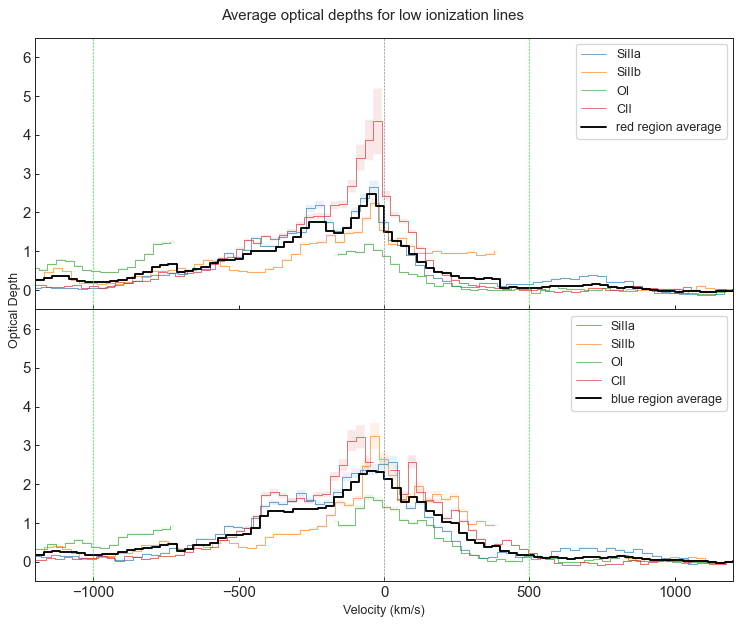

In [10]:
# Plot for LOW ionization optical depth
# ------------------------------------------------------------------

fig,ax = plt.subplots(len(norm_data),1,sharex=True,sharey=True,figsize=(10,len(norm_data)*4),dpi=90)
for i in range(len(norm_data)):

    # optical depths
    ax[i].plot(velo(("SiIIa", 1260.4221)),od[i],lw=0.5,drawstyle='steps-mid',label='SiIIa')
    ax[i].plot(opp1,od[i],lw=0.5,drawstyle='steps-mid',label='SiIIb')
    ax[i].plot(opp,od[i],lw=0.5,drawstyle='steps-mid',label="OI")
    ax[i].plot(velo(("CII", 1334.5323)),od[i],lw=0.5,drawstyle='steps-mid',label="CII")

    # errors
    ax[i].fill_between(velo(("SiIIa", 1260.4221)), od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(opp1, od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(opp, 
                        od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(velo(("CII", 1334.5323)), 
                        od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)

    # average profile
    ax[i].plot(xvals,np.nanmean(low_od[i],axis=0),color='k',label='%s region average'%col[i],drawstyle="steps-mid")
    
    # EW calculation limits
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)


    ax[i].axvline(0,color='gray',ls='--',lw=0.5)
    ax[i].set_xlim(-1200,1200)
    ax[i].set_ylim(-0.5,6.5)
    ax[i].legend()
ax[0].get_shared_x_axes().join(ax[0], ax[1])
ax[1].set_xlabel('Velocity (km/s)')
ax[1].yaxis.set_label_coords(-0.02,1)
ax[1].set_ylabel('Optical Depth')
plt.suptitle('Average optical depths for low ionization lines',y=0.92)
plt.subplots_adjust(hspace=0)

# plt.savefig('low_ion_optd.png')
plt.show()

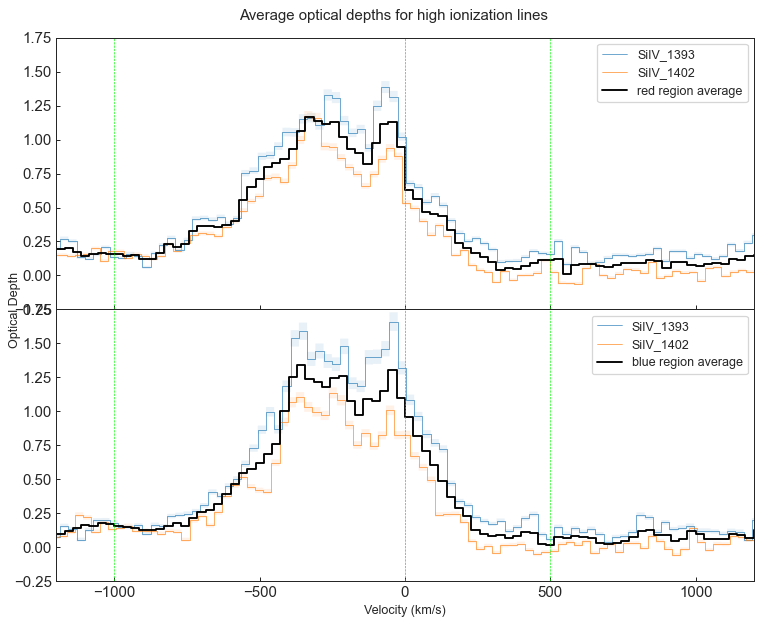

In [11]:
# Plot for HIGH ionization optical depth
# ------------------------------------------------------------------
fig,ax = plt.subplots(len(norm_data),1,sharex=True,figsize=(10,len(norm_data)*4),dpi=90)
for i in range(len(norm_data)):
    for j in high_ion.items():
        # optical depths
        ax[i].plot(velo(j),od[i],lw=0.5, drawstyle="steps-mid",label='%s'%j[0])
        # errors
        ax[i].fill_between(velo(j), od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)

    # average profile
    ax[i].plot(xvals,high_od[i],color='k',label='%s region average'%col[i],drawstyle="steps-mid")

    # EW calculation limits
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)

    ax[i].axvline(0,color='gray',ls='--',lw=0.5)
    ax[i].set_xlim(-1200,1200)
    ax[i].set_ylim(-0.25,1.75)
    ax[i].legend()
ax[0].get_shared_x_axes().join(ax[0], ax[1])
ax[1].set_xlabel('Velocity (km/s)')
ax[1].yaxis.set_label_coords(-0.05,1)
ax[1].set_ylabel('Optical Depth')
plt.suptitle('Average optical depths for high ionization lines',y=0.92)
plt.subplots_adjust(hspace=0)

# plt.savefig('high_ion_optd.png')
plt.show()

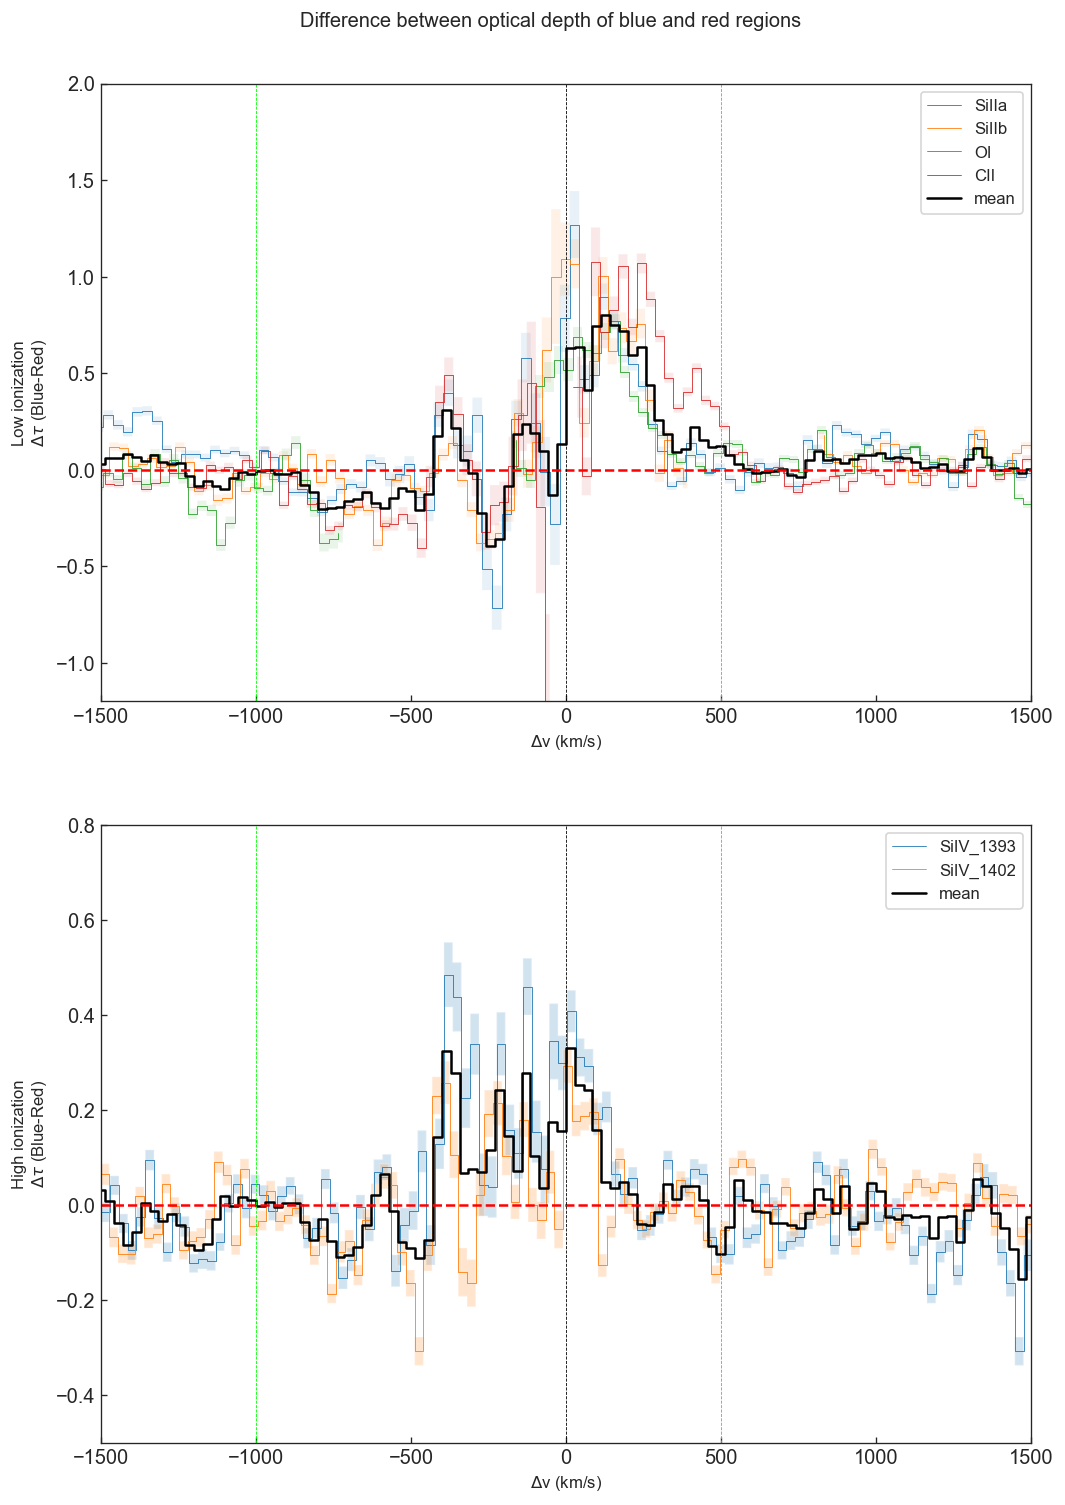

In [12]:
# difference plot for optical depths
# ------------------------------------------------------------------

fig, ax = plt.subplots(2,1,figsize=(10,15),dpi=120)

# axis1
# --------------------------------------------------
ax[0].set_ylabel('Low ionization' '\n' r'$\Delta \tau$ (Blue-Red)',fontsize=10)

# optical depths for low_ion
ax[0].plot(velo(("SiIIa", 1260.4221)),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='SiIIa')
ax[0].plot(opp1,od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='SiIIb')
ax[0].plot(opp,od[1]-od[0],lw=0.5,drawstyle='steps-mid',label="OI")
ax[0].plot(velo(("CII", 1334.5323)),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label="CII")

# errors
ax[0].fill_between(velo(("SiIIa", 1260.4221)), od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(opp1, od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(opp, 
                    od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(velo(("CII", 1334.5323)), 
                    od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)


ax[0].plot(xvals,np.nanmean(low_od[1],axis=0)-np.nanmean(low_od[0],axis=0),'k',drawstyle='steps-mid',label='mean')
ax[0].set_ylim(-1.2,2)
# axis2
# --------------------------------------------------
ax[1].set_ylabel('High ionization' '\n' r'$\Delta \tau$ (Blue-Red)',fontsize=10)

# optical depths and errors for high_ion
for j in high_ion.items():
    ax[1].plot(velo(j),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='%s'%j[0])
    ax[1].fill_between(velo(j), od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.2)


ax[1].plot(xvals,high_od[1]-high_od[0],'k',drawstyle='steps-mid',label='mean')
ax[1].set_ylim(-0.5,0.8)

for i in range(len(norm_data)):
    ax[i].axhline(0,color='r',ls='--')
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)
    ax[i].axvline(0,color='k',ls='--',lw=0.5)
    ax[i].set_xlim(-1500,1500)
    ax[i].legend()
    ax[i].set_xlabel(r'$\Delta$v (km/s)')
    # ax[i].set_ylabel(r'$\Delta \tau$ (Blue-Red)')
    # plt.subplots_adjust(hspace=0)

plt.suptitle('Difference between optical depth of blue and red regions',y=0.92)
plt.savefig('optd_diff.png')
plt.show()

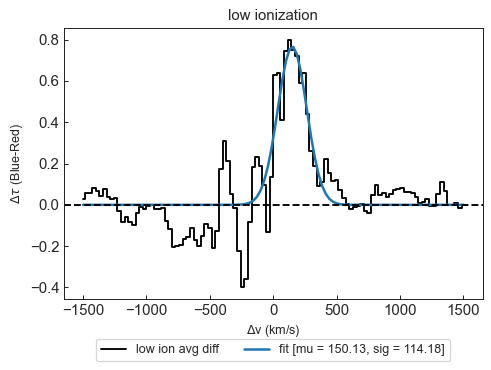

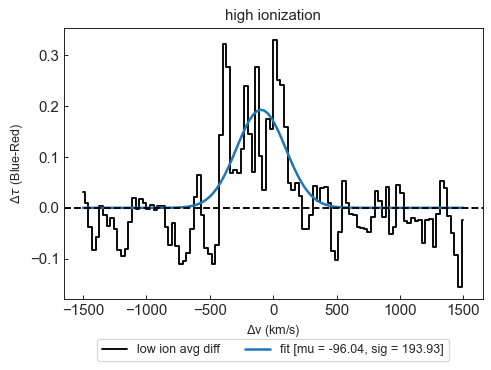

[  0.76666377 150.12516341 114.17921481] [ 1.93098621e-01 -9.60369371e+01  1.93929423e+02]


In [13]:
# new array to hold both the means of low and high ionization lines
od_mean = (np.nanmean(low_od[1],axis=0)-np.nanmean(low_od[0],axis=0),high_od[1]-high_od[0])

# define a single gaussian function to fit
def gaussian(x, A, mu, sig):
    return A * np.exp(-(x - mu)**2 / 2 / sig**2)

def gaussian(x, A, x0, sig):
    return A*np.exp(-(x-x0)**2/(2*sig**2))

# LOW ION PLOT
# --------------------------------------------------
popt,pcov = curve_fit(gaussian,xvals,od_mean[0],p0=[1,210,10]) # expected peak around 200
fit = gaussian(xvals.value,*popt)
low_ion_fit = popt

plt.figure(num=1,dpi=90)

plt.plot(xvals,od_mean[0],color='k',drawstyle='steps-mid',label='low ion avg diff') # low ionization
plt.plot(xvals,fit,label='fit [mu = %0.2f, sig = %0.2f]'%(popt[1],popt[2]),lw=2) # fitted profile

plt.title('low ionization')
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'$\Delta$v (km/s)')
plt.axhline(0,color='k',ls='--')

plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
plt.show()

# HIGH ION PLOT
# --------------------------------------------------
popt,pcov = curve_fit(gaussian,xvals,od_mean[1],p0=[1,0,100]) #expected peak around 200
fit = gaussian(xvals.value,*popt)
high_ion_fit = popt

plt.figure(num=2,dpi=90)

plt.plot(xvals,od_mean[1],color='k',drawstyle='steps-mid',label='low ion avg diff') # low ionization
plt.plot(xvals,fit,label='fit [mu = %0.2f, sig = %0.2f]'%(popt[1],popt[2]),lw=2) #fitted profile

plt.title('high ionization')
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'$\Delta$v (km/s)')
plt.axhline(0,color='k',ls='--')

plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
plt.show()

print(low_ion_fit,high_ion_fit)


In [14]:
# Check which lines might affect the difference from the optical depth vs rest wavelength plot above

# lines with relatively higher difference in optical depth

# 1063.9718  FeII_1063.9

# 1083.9900  NII_1084

# 1122.5260  FeIII_1122

'''blended'''
# 1133.6650  FeII_1133   
# 1134.1653  NI_1134.1
# 1134.4149  NI_1134.4
# 1134.9803  NI_1134.9



'''blended'''
# 1190.2080  SIII_1190
# 1190.4158  SiII_1190

# 1193.2897  SiII_1193

'''blended'''
# 1199.3910  MnII_1199
# 1199.5496  NI_1199

'''blended'''
# 1200.2233  NI_1200.2
# 1200.7098  NI_1200.7
# 1201.1180  MnII_1201

# 1207.0500  FeIII_1207

# 1260.4221  SiII_1260 (used to model the average profile)
# 1260.5330  FeII_1260

# 1302.1685  OI_1302 (used to model the average profile)

'''blended'''
# 1304.3702  SiII_1304 (used to model the average profile)
# 1304.8576  OI*_1304 (photospheric)

'''blended'''
# 1335.6627  CII*_1335.6 (photospheric)
# 1335.7077  CII*_1335.7 (photospheric)

'''blended'''
# 1393.3240  NiII_1393
# 1393.7550  SiIV_1393

dictum = OrderedDict([
    ('FeII_1063.9',1063.9718),
    ('NII_1084',1083.9900),
    ('FeIII_1122',1122.5260),
    ('FeII_1133',1133.6650),
    ('NI_1134.1',1134.1653),
    ('NI_1134.4',1134.4149),
    ('NI_1134.9',1134.9803),
    ('SIII_1190',1190.2080),
    ('SiII_1190',1190.4158),
    ('SiII_1193',1193.2897),
    # ('NI_1200.2',1200.2233),
    # ('NI_1200.7',1200.7098),
    # ('MnII_1201',1201.1180),
    ('FeIII_1207',1207.0500),
    # ('SiII_1260',1260.4221),
    # ('FeII_1260',1260.5330),
    ('OI_1302',1302.1685),
    # ('SiII_1304',1304.3702),
    # ('OI*_1304',1304.8576),
    # ('CII*_1335.6',1335.6627),
    # ('CII*_1335.7',1335.7077),
    # ('NiII_1393',1393.3240),
    # ('SiIV_1393',1393.7550)
])


In [15]:
mean = low_ion_fit[1] * u.km / u.s #get mean from the fit above
sig = low_ion_fit[2] * u.km / u.s #get standard deviation

mask = np.isfinite(od[1]-od[0])
masked_od = od[1][mask]-od[0][mask]

def gauss(x, A, x0, sig):
    return A*np.exp(-(x-x0)**2/(2*sig**2))

def multi_gaussg(x, *pars):
    # offset = pars[-1]
    corwave = np.zeros(len(dictum)) * u.AA
    corsig = np.zeros(len(dictum)) * u.AA

    for i in range(len(dictum)):
        wave = list(dictum.values())[i]
        corwave[i] = (mean/c.c.to(u.km/u.s) + 1) * wave * u.AA #get the corresponding wavelength
        corsig[i] = sig / c.c.to(u.km/u.s) * wave * u.AA #get the corresponding standard deviation

    g = np.zeros((len(dictum),(len(nwavelength[mask])))) #initialize the array each of the gaussians
    for i in range(len(dictum)):
        g[i] = gauss(x,pars[i],corwave[i].value,corsig[i].value) #add each gaussian to the array
    return np.sum(g,axis=0)

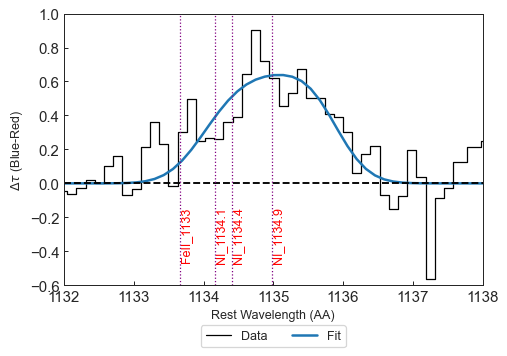

[0.25970517 0.23573231 0.19854501 0.42554183]


In [16]:

# Initial guesses for the parameters to fit:
# 3 amplitudes, means and standard deviations (plus an offset)
dictum = OrderedDict([
    ('FeII_1133',1133.6650),
    ('NI_1134.1',1134.1653),
    ('NI_1134.4',1134.4149),
    ('NI_1134.9',1134.9803),
])
guess = np.ones(len(dictum))
popt, pcov = curve_fit(multi_gaussg, nwavelength[mask].value, masked_od, guess)

plt.figure(dpi=90)
plt.plot(nwavelength[mask].value, masked_od, drawstyle="steps-mid", color='k', linewidth=1, label='Data')
plt.plot(nwavelength[mask].value, multi_gaussg(nwavelength[mask].value, *popt), linewidth=2, label='Fit')
plt.axhline(1,color='k',ls='--')
plt.xlim(1132,1138) #change the window to view the fit
plt.ylim(-0.6,1.0002)
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'Rest Wavelength (AA)')
plt.axhline(0,color='k',ls='--')

for line in newlines.items():
    plt.axvline(line[1], linestyle=":", color="purple", lw=1)
    plt.text(line[1],-0.3, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)


plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
plt.show()

print(popt)


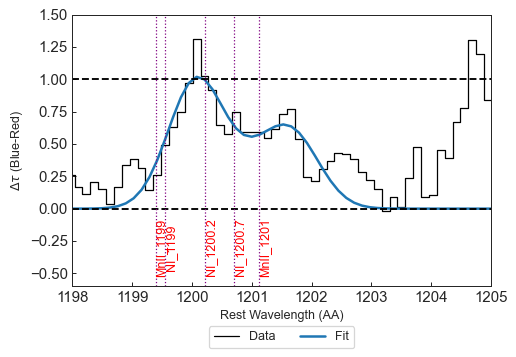

[0.55575618 0.43099304 0.15486694 0.19107631 0.46510001]


In [17]:
dictum=OrderedDict([
    ('MnII_1199',1199.3910),
    ('NI_1199',1199.5496),
    ('NI_1200.2',1200.2233),
    ('NI_1200.7',1200.7098),
    ('MnII_1201',1201.1180),
])

# Initial guesses for the parameters to fit:
guess = np.ones(len(dictum))
popt, pcov = curve_fit(multi_gaussg, nwavelength[mask].value, masked_od, guess)

plt.figure(dpi=90)
plt.plot(nwavelength[mask].value, masked_od, drawstyle="steps-mid", color='k', linewidth=1, label='Data')
plt.plot(nwavelength[mask].value, multi_gaussg(nwavelength[mask].value, *popt), linewidth=2, label='Fit')
plt.axhline(1,color='k',ls='--')
plt.xlim(1198,1205) #change the window to view the fit
plt.ylim(-0.6,1.5)
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'Rest Wavelength (AA)')
plt.axhline(0,color='k',ls='--')

for line in newlines.items():
    plt.axvline(line[1], linestyle=":", color="purple", lw=1)
    plt.text(line[1],-0.3, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)


plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
plt.show()
print(popt)

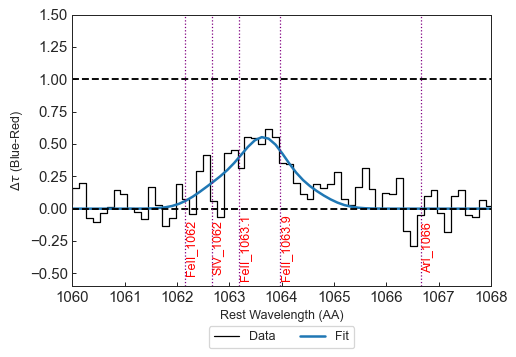

[0.12468128 0.13520694 0.46622762 0.11803896]


In [18]:
dictum = OrderedDict([
    ('FeII_1062',1062.1520),
    ('SIV_1062',1062.6620),
    ('SIV_1063.1',1063.1764),
    ('FeII_1063.9',1063.9718),
])

guess = np.ones(len(dictum))
popt, pcov = curve_fit(multi_gaussg, nwavelength[mask].value, masked_od, guess)

plt.figure(dpi=90)
plt.plot(nwavelength[mask].value, masked_od, drawstyle="steps-mid", color='k', linewidth=1, label='Data')
plt.plot(nwavelength[mask].value, multi_gaussg(nwavelength[mask].value, *popt), linewidth=2, label='Fit')
plt.axhline(1,color='k',ls='--')
plt.xlim(1060,1068) #change the window to view the fit
plt.ylim(-0.6,1.5)
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'Rest Wavelength (AA)')
plt.axhline(0,color='k',ls='--')

for line in newlines.items():
    plt.axvline(line[1], linestyle=":", color="purple", lw=1)
    plt.text(line[1],-0.3, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)


plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
plt.show()
print(popt)

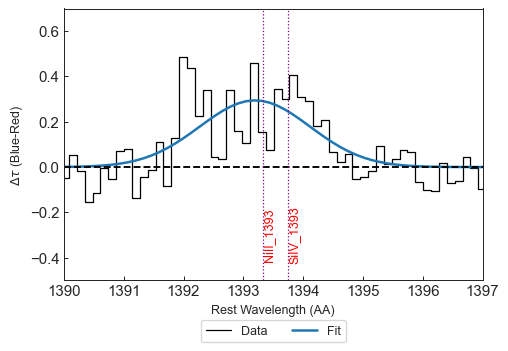

[0.08324423 0.21789366]


In [19]:
mean = high_ion_fit[1] * u.km / u.s
sig = high_ion_fit[2] * u.km / u.s

dictum = OrderedDict([
    ('NiII_1393',1393.3240),
    ('SiIV_1393',1393.7550)
])

guess = np.ones(len(dictum))
popt, pcov = curve_fit(multi_gaussg, nwavelength[mask].value, masked_od, guess)

plt.figure(dpi=90)
plt.plot(nwavelength[mask].value, masked_od, drawstyle="steps-mid", color='k', linewidth=1, label='Data')
plt.plot(nwavelength[mask].value, multi_gaussg(nwavelength[mask].value, *popt), linewidth=2, label='Fit')
plt.axhline(1,color='k',ls='--')
plt.xlim(1390,1397) #change the window to view the fit
plt.ylim(-0.5,0.7)
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'Rest Wavelength (AA)')
plt.axhline(0,color='k',ls='--')

for line in newlines.items():
    plt.axvline(line[1], linestyle=":", color="purple", lw=1)
    plt.text(line[1],-0.3, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)


plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
plt.show()
print(popt)

In [20]:
# Working on making a subplot of all the fits